# Explore here

In [104]:
# Imports
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import spotipy

from dotenv import load_dotenv
from spotipy.oauth2 import SpotifyClientCredentials

In [105]:
# Environment variables
load_dotenv()

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

In [106]:
# Request token & sp instance
auth_manager = SpotifyClientCredentials(client_id = client_id, client_secret = client_secret)
sp = spotipy.Spotify(auth_manager = auth_manager)

In [107]:
# Get favourite artist data function
def get_artist_top_tracks(artist_id):
    top_tracks = []

    urn = f"spotify:artist:{artist_id}"
    artist = sp.artist(urn)
    artist_name = artist["name"]

    tracks = sp.artist_top_tracks(artist_id)

    for each, track in enumerate(tracks["tracks"], start=1):
        track_data = {
            "artist_name": artist_name,
            "name": track["name"],
            "duration": round(track["duration_ms"] / 1000 / 60, 2),
            "popularity": track["popularity"]
        }

        top_tracks.append(track_data)

    return top_tracks

In [108]:
# Get top 10 tracks and turn it into Data Frame
artist_id = "2NPduAUeLVsfIauhRwuft1"
top_10_df = pd.DataFrame(get_artist_top_tracks(artist_id))

top_10_df

,artist_name,name,duration,popularity
0,Nightwish,Nemo,4.60,63
1,Nightwish,Wish I Had an Angel,4.10,61
2,Nightwish,Amaranth,3.86,59
3,Nightwish,The Phantom Of The Opera,4.15,57
4,Nightwish,Storytime,5.37,56
5,Nightwish,An Ocean Of Strange Islands,9.44,54
6,Nightwish,Last Ride of the Day,4.52,56
7,Nightwish,Perfume Of The Timeless,8.20,53
8,Nightwish,Bye Bye Beautiful,4.24,54
9,Nightwish,Élan,4.78,55


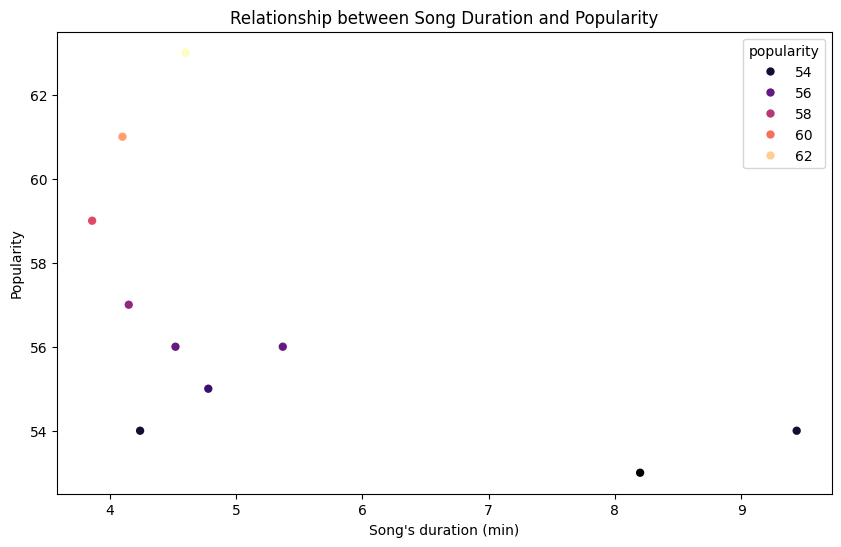

In [109]:
# Show Data Frame content in a scatter plot graph as analyze the relation between duration and popularity
plt.figure(figsize = (10, 6))
sns.scatterplot(data = top_10_df, x = "duration", y = "popularity", palette = "magma", edgecolor='none', alpha=1, hue = "popularity", legend = True)

plt.xlabel("Song's duration (min)")
plt.ylabel("Popularity")
plt.title("Relationship between Song Duration and Popularity")

plt.show()

In [110]:
# Since analysis with only 10 songs may not be reliable enough, one is performed with a bigger number to compare the data
def get_all_tracks(artist_id):
    tracks = []

    urn = f"spotify:artist:{artist_id}"
    artist = sp.artist(urn)
    artist_name = artist["name"]
    
    albums = sp.artist_albums(artist_id, album_type="album", limit=50)

    for album in albums["items"]:
        album_tracks = sp.album_tracks(album["id"])

        for track in album_tracks["items"]:
            track_details = sp.track(track["id"])

            track_data = {
                "artist_name": artist_name,
                "album_name": album["name"],
                "name": track['name'],
                "duration": round(track['duration_ms'] / 1000 / 60, 2),
                "popularity": track_details["popularity"],
            }

            tracks.append(track_data)

    return pd.DataFrame(tracks)

artist_id = "2NPduAUeLVsfIauhRwuft1"

songs_df = pd.DataFrame(get_all_tracks(artist_id))
songs_df.head()

,artist_name,album_name,name,duration,popularity
0,Nightwish,Yesterwynde,Yesterwynde,2.72,51
1,Nightwish,Yesterwynde,An Ocean Of Strange Islands,9.44,54
2,Nightwish,Yesterwynde,The Antikythera Mechanism,5.92,52
3,Nightwish,Yesterwynde,The Day Of...,4.58,53
4,Nightwish,Yesterwynde,Perfume Of The Timeless,8.20,53


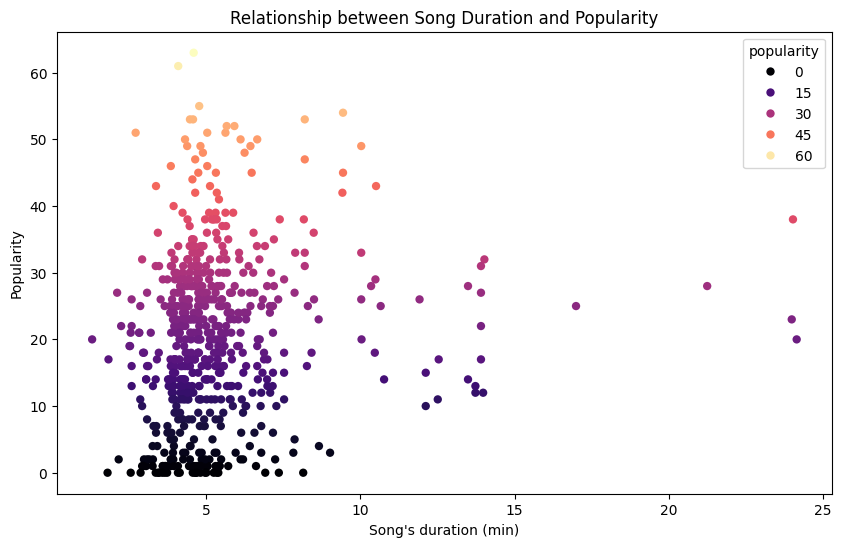

In [111]:
# Show songs Data Frame content in a scatter plot graph as analyze the relation between duration and popularity
plt.figure(figsize = (10, 6))
sns.scatterplot(data = songs_df, x = "duration", y = "popularity", palette = "magma", edgecolor='none', alpha=1, hue = "popularity", legend = True)

plt.xlabel("Song's duration (min)")
plt.ylabel("Popularity")
plt.title("Relationship between Song Duration and Popularity")

plt.show()

Analizando el gráfico anterior, podríamos decir que existe cierta relación entre la popularidad y la duración de las canciones, ya que las más populares se encuentran aproximadamente entre los 2 y 6 minutos de duración. Además en las canciones que superan los 10 minutos, se mantiene una popularidad media. 

Sin embargo, la mayoría de las canciones se ubican en el rango de entre 3 y 5 minutos, en el que podemos encontrar todos los niveles de popularidad.

En conclusión, se podría deducir que la duración de 3 a 6 minutos parece ser el rango óptimo para alcanzar alta popularidad, pero no es un factor decisivo por sí solo.